## 1- Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## 2- Loading the dataset

In [2]:
from sklearn.datasets import make_regression
np.random.seed(0)
X, y = make_regression(n_samples=100, n_features=2, noise=10)

In [3]:
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


## 3- Visualising each feature across the target

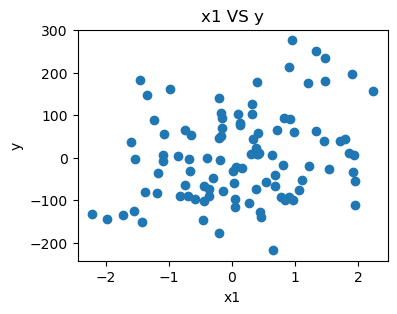

In [4]:
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],y)
plt.title('x1 VS y')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

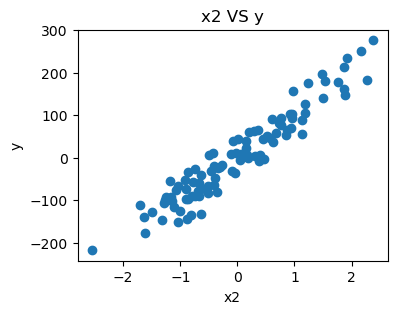

In [5]:
plt.figure(figsize=(4,3))
plt.scatter(X[:,1],y)
plt.title('x2 VS y')
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

# The multiple linear regression model

## 1- Initializing parameters

In [6]:
def initialize_parameters(dim):
    w = np.zeros((dim,1))
    b = 0.
    return w,b

In [7]:
w, b = initialize_parameters(X.shape[1])

In [8]:
print("w= ",w)
print("b= ",b)

w=  [[0.]
 [0.]]
b=  0.0


## 2- Defining the model

In [9]:
def model(w,b,X):
    return np.dot(X,w) + b

## 3- Computing the cost function

In [10]:
def cost_function(w,b,X,y):
    m = X.shape[0]
    return 1/(2*m) * np.sum((model(w,b,X)-y)**2)

In [11]:
print(cost_function(w,b,X,y))

5348.916422192195


## 4- Gradient descent

In [12]:
def gradient(w,b,X,y):
    m = X.shape[0]
    dj_dw = 1/m * np.dot(X.T,model(w,b,X)-y)
    dj_db = 1/m * np.sum(model(w,b,X)-y)
    return dj_dw, dj_db

In [13]:
def gradient_descent(w,b,X,y,learning_rate,epochs):
    history = []
    for i in range(epochs):
        dj_dw,dj_db = gradient(w,b,X,y)
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        history.append(cost_function(w,b,X,y))
    return w,b,history

In [14]:
learning_rate = 0.01
epochs = 1000
w,b,history = gradient_descent(w,b,X,y,learning_rate,epochs)

In [25]:
print(f"Iteration {1:3d}: {history[i]}")
for i in range(len(history)):
    if (i+1)%100 == 0:
        print(f"Iteration {i:3d}: {history[i]}")

Iteration   1: 44.51271697666633
Iteration  99: 711.9666312223651
Iteration 199: 129.26190525247029
Iteration 299: 55.3990568372888
Iteration 399: 45.931644652480564
Iteration 499: 44.70099114969016
Iteration 599: 44.538226265467074
Iteration 699: 44.51624953623643
Iteration 799: 44.51321100333884
Iteration 899: 44.51277983625977
Iteration 999: 44.51271697666633


## 5- The learning curve

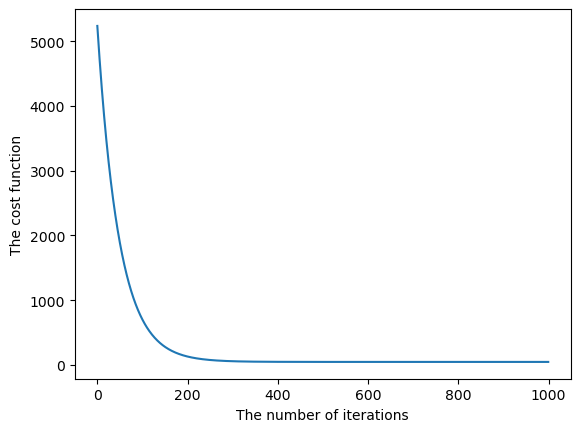

In [16]:
plt.plot(range(epochs), history)
plt.xlabel('The number of iterations')
plt.ylabel('The cost function')
plt.show()

## 6- Evaluating the model performance - coefficient of determination

In [17]:
def coef_determination(w,b,X,y):
    RSS = np.sum((model(w,b,X)-y)**2)
    TSS = np.sum((y - np.mean(y))**2)
    return 1 - RSS/TSS

In [18]:
print(coef_determination(w,b,X,y))

0.9916687122478256
